In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
inf = pd.read_csv("crim_gen_1_Data.csv", sep=",")
inf.drop(columns="Flag and Footnotes", inplace = True)
inf.dropna(axis=0,inplace=True)
inf

,TIME,GEO,UNIT,ICCS,Value
5,1998,Bulgarie,Nombre,Total,163988.0
6,1998,Bulgarie,Nombre,Homicide intentionnel,381.0
8,1998,Bulgarie,Nombre,Vol qualifié,4494.0
9,1998,Bulgarie,Nombre,Cambriolage de locaux résidentiels privés,4383.0
10,1998,Tchéquie,Nombre,Total,42593.0
11,1998,Tchéquie,Nombre,Homicide intentionnel,183.0
12,1998,Tchéquie,Nombre,Actes portant atteinte ou visant à porter atte...,2381.0
13,1998,Tchéquie,Nombre,Vol qualifié,4306.0
14,1998,Tchéquie,Nombre,Cambriolage de locaux résidentiels privés,12752.0
15,1998,Danemark,Nombre,Total,499167.0


In [4]:
inf2 = inf[inf['TIME'] == 2007]
inf2.groupby(['ICCS']).head()
h = pd.DataFrame(inf2[inf2["ICCS"]== "Homicide intentionnel"].sum())
h.drop(['TIME', 'GEO', 'UNIT', 'ICCS'], inplace=True)
inf2.groupby(['ICCS']).head()
a = pd.DataFrame(inf2[inf2["ICCS"]== "Actes portant atteinte ou visant à porter atteinte à la personne, actes préjudiciables à caractère sexuel et actes visant des biens avec violence ou menaces contre une personne"].sum())
a.drop(['TIME', 'GEO', 'UNIT', 'ICCS'], inplace=True)
inf2.groupby(['ICCS']).head()
v = pd.DataFrame(inf2[inf2["ICCS"]== "Vol qualifié"].sum())
v.drop(['TIME', 'GEO', 'UNIT', 'ICCS'], inplace=True)
inf2.groupby(['ICCS']).head()
c = pd.DataFrame(inf2[inf2["ICCS"]== "Cambriolage de locaux résidentiels privés"].sum())
c.drop(['TIME', 'GEO', 'UNIT', 'ICCS'], inplace=True)

In [5]:
h.rename(columns={0:'Value'})
h.rename({'Value':'Homicide'}, inplace=True, axis='index')
a.rename(columns={0:'Value'})
a.rename({'Value':'Actes Violents'}, inplace=True, axis='index')
v.rename(columns={0:'Value'})
v.rename({'Value':'Vol qualifié'}, inplace=True, axis='index')
c.rename(columns={0:'Value'})
c.rename({'Value':'Cambriolage'}, inplace=True, axis='index')

In [6]:
all1 = pd.concat([h, a])
all2 = pd.concat([v, c])
all3 = pd.concat([all1, all2])
all3.rename(columns={0:'Value'})

,Value
Homicide,8298
Actes Violents,2.82594e+06
Vol qualifié,621688
Cambriolage,1.2669e+06


Text(0.5,1,'répartition des infractions en 2007 en proportions par type')

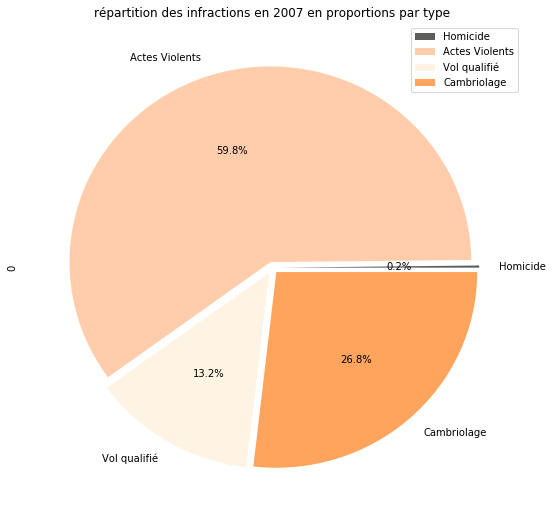

In [20]:
plot = all3.plot.pie(subplots=True, colors = ['#5d5d5a', '#ffcdab', '#fff4e3', '#ffa45c'], explode = [0.03,0.03,0.03,0.03], autopct = "%1.1f%%",figsize=(9, 9))
plt.title('répartition des infractions en 2007 en proportions par type', color='Black')